In [9]:
from collections import namedtuple
servoData = namedtuple('servoData', 'motor, screw, pgain, vgain, cls')

data = [servoData(*line.split(",")) for line in open('servo.data')]

data[:10]

[servoData(motor='E', screw='E', pgain='5', vgain='4', cls=' 0.28125095\n'),
 servoData(motor='B', screw='D', pgain='6', vgain='5', cls=' 0.5062525\n'),
 servoData(motor='D', screw='D', pgain='4', vgain='3', cls=' 0.35625148\n'),
 servoData(motor='B', screw='A', pgain='3', vgain='2', cls=' 5.500033\n'),
 servoData(motor='D', screw='B', pgain='6', vgain='5', cls=' 0.35625148\n'),
 servoData(motor='E', screw='C', pgain='4', vgain='3', cls=' 0.8062546\n'),
 servoData(motor='C', screw='A', pgain='3', vgain='2', cls=' 5.100014\n'),
 servoData(motor='A', screw='A', pgain='3', vgain='2', cls=' 5.7000422\n'),
 servoData(motor='C', screw='A', pgain='6', vgain='5', cls=' 0.76875436\n'),
 servoData(motor='D', screw='A', pgain='4', vgain='1', cls=' 1.0312537\n')]

In [10]:
for i, item in enumerate(data):
    clsNew = item.cls.strip()
    clsNew = float(clsNew)
    clsNew = float("{0:.3f}".format(clsNew))
    data[i] = servoData(item.motor, item.screw.lower(), int(item.pgain), int(item.vgain), clsNew)
data[:10]

[servoData(motor='E', screw='e', pgain=5, vgain=4, cls=0.281),
 servoData(motor='B', screw='d', pgain=6, vgain=5, cls=0.506),
 servoData(motor='D', screw='d', pgain=4, vgain=3, cls=0.356),
 servoData(motor='B', screw='a', pgain=3, vgain=2, cls=5.5),
 servoData(motor='D', screw='b', pgain=6, vgain=5, cls=0.356),
 servoData(motor='E', screw='c', pgain=4, vgain=3, cls=0.806),
 servoData(motor='C', screw='a', pgain=3, vgain=2, cls=5.1),
 servoData(motor='A', screw='a', pgain=3, vgain=2, cls=5.7),
 servoData(motor='C', screw='a', pgain=6, vgain=5, cls=0.769),
 servoData(motor='D', screw='a', pgain=4, vgain=1, cls=1.031)]

# Multiplots

<h3> 
i. Produce 5 * 4 = 20 plots <br>
ii. Based on the resulting pattern, make one or more relationship more sophisticated
</h3>

 <h3> 1. Plotting types of motor with types of screws </h3>

In [11]:
ls = ['A', 'B', 'C', 'D', 'E']
from collections import defaultdict, Counter
# motor with servo
motorData = defaultdict(list)
for item in data:
    motorData[item.motor].append(item.screw)
motorServoCount = defaultdict(Counter)
for motorType, servoTypes in motorData.items():
    motorServoCount[motorType]= Counter(servoTypes)
    motorServoCount[motorType] = sorted(motorServoCount[motorType].items(), key=lambda pair: pair[0], reverse=True)


In [12]:
motorServoCount

defaultdict(collections.Counter,
            {'E': [('e', 6), ('d', 6), ('c', 7), ('b', 7), ('a', 7)],
             'B': [('e', 7), ('d', 7), ('c', 7), ('b', 7), ('a', 8)],
             'D': [('e', 2), ('d', 3), ('c', 3), ('b', 7), ('a', 7)],
             'C': [('e', 7), ('d', 7), ('c', 7), ('b', 7), ('a', 12)],
             'A': [('e', 7), ('d', 7), ('c', 7), ('b', 7), ('a', 8)]})

# <h3> To-do: adjust level of precision for values of attribute: class (cls). </h3>

In [14]:
import matplotlib.pyplot as plt

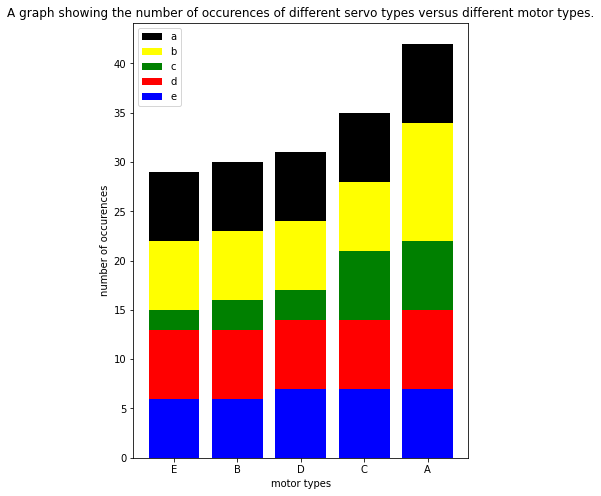

In [19]:
import numpy as np
figure = plt.figure(figsize=[6.0,8.0])
index = [ key for key, _ in motorServoCount.items() ]
# index = sorted(index)
y_offset = np.zeros(5)
plots = []
c = 0
colors=['blue', 'red', 'green', 'yellow', 'black']
for key, counts in motorServoCount.items():
    
    plots.append(plt.bar(index, [pair[1] for pair in counts], bottom=y_offset, color=colors[c]))
    y_offset = y_offset + [pair[1] for pair in counts]
    c += 1
plt.legend((plots[4], plots[3], plots[2], plots[1], plots[0]), ('a', 'b', 'c', 'd', 'e'))
plt.xlabel('motor types')
plt.ylabel('number of occurences')
plt.title('A graph showing the number of occurences of different servo types versus different motor types.')
plt.show()

<h3>
As we can see motor type A has more number of type B servos. All motor types except type C have less number of 
type C servos.
</h3>

<h3> 2. Plotting types of motors with pgain. </h3>

In [37]:
# pgain is a numeric variable with a range of 0 to 10 or so

Counter([1,1,2,2])

Counter({1: 2, 2: 2})

In [38]:
motorData = defaultdict(list)
for item in data:
    
    motorData[item.motor].append(str(item.pgain))
motorPgainCount = defaultdict(Counter)
for motorType, pgain in motorData.items():
    motorPgainCount[motorType]= Counter(pgain)
    motorPgainCount[motorType] = sorted(motorPgainCount[motorType].items(), key=lambda pair: pair[0], reverse=True)


In [41]:
motorPgainCount

defaultdict(collections.Counter,
            {'E': [('6', 5), ('5', 5), ('4', 13), ('3', 10)],
             'B': [('6', 5), ('5', 6), ('4', 15), ('3', 10)],
             'D': [('6', 2), ('5', 2), ('4', 8), ('3', 10)],
             'C': [('6', 8), ('5', 7), ('4', 15), ('3', 10)],
             'A': [('6', 5), ('5', 6), ('4', 15), ('3', 10)]})

string: E, count: [('6', 5), ('5', 5), ('4', 13), ('3', 10)]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

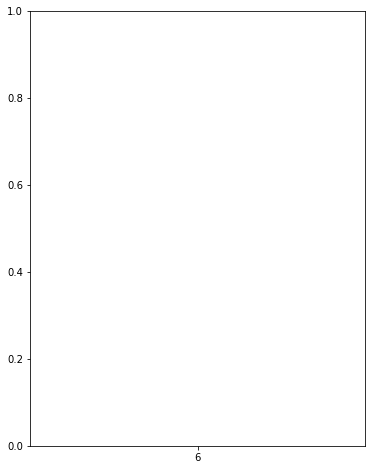

In [45]:
figure = plt.figure(figsize=[6.0,8.0])
index = [ '6','5','4','3' ]
# index = sorted(index)
y_offset = np.zeros(5)
plots = []
for key, counts in motorPgainCount.items():
    print("string: {0}, count: {1}".format(key, counts))
    plots.append(plt.bar(index, [pair[1] for pair in counts], bottom=y_offset))
    y_offset = y_offset + [pair[1] for pair in counts]
plt.legend((plots[4], plots[3], plots[2], plots[1], plots[0]), ('a', 'b', 'c', 'd', 'e'))
plt.xlabel('motor types')
plt.ylabel('number of occurences')
plt.title('A graph showing the number of occurences of different pgain values versus different motor types.')
plt.show()

In [2]:
import math
math.inf

inf

In [3]:
max([1,2,3])

3

In [4]:
help(max)

Help on built-in function max in module builtins:

max(...)
    max(iterable, *[, default=obj, key=func]) -> value
    max(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its biggest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the largest argument.



In [15]:
# Python program for implementation of Quicksort Sort
 
# This function takes last element as pivot, places
# the pivot element at its correct position in sorted
# array, and places all smaller (smaller than pivot)
# to left of pivot and all greater elements to right
# of pivot
 
 
def partition(arr, low, high):
    i = (low-1)         # index of smaller element
    pivot = arr[high]     # pivot
 
    for j in range(low, high):
 
        # If current element is smaller than or
        # equal to pivot
        if arr[j] <= pivot:
 
            # increment index of smaller element
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
 
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)
 
# The main function that implements QuickSort
# arr[] --> Array to be sorted,
# low  --> Starting index,
# high  --> Ending index
 
# Function to do Quick sort
 
 
def quickSort(arr, low, high):
    if len(arr) == 1:
        return arr
    if low < high:
 
        # pi is partitioning index, arr[p] is now
        # at right place
        pi = partition(arr, low, high)
 
        # Separately sort elements before
        # partition and after partition
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)
 
# [5, 6, 3, 4, 2, 8] --> [5,6,3,4,8,2] --> [5,6,3,8,2,4] --> [5,6,3,8,4,2] -> [5,6,4,2,3,8]
        # [5,6,4,2,8,3] --> [5,6,4,3,2,8]
        
        # start from back
        # if not descending order, keep going
        # swap the element that's descending to prev with the one just bigger, from so far seen
        # sort and add array slice to the right of newly swapped low index element
        if nums == []: return 
        l = len(nums)
        import math
        prev = -math.inf
        for i in range(l-1, -1, -1):
            if nums[i] < prev:
                                    
                m = max(nums[i+1:])
                swap = nums.index(m)
                nums[swap] = nums[i]
                nums[i] = m
                sort()
            prev = nums[i]

In [16]:
public class Solution {
    public void nextPermutation(int[] nums) {
        int i = nums.length - 2;
        while (i >= 0 && nums[i + 1] <= nums[i]) {
            i--;
        }
        if (i >= 0) {
            int j = nums.length - 1;
            while (j >= 0 && nums[j] <= nums[i]) {
                j--;
            }
            swap(nums, i, j);
        }
        reverse(nums, i + 1);
    }

    private void reverse(int[] nums, int start) {
        int i = start, j = nums.length - 1;
        while (i < j) {
            swap(nums, i, j);
            i++;
            j--;
        }
    }

    private void swap(int[] nums, int i, int j) {
        int temp = nums[i];
        nums[i] = nums[j];
        nums[j] = temp;
    }
}

if 

None


In [14]:
a = [1,2,3]
b = [3,2,1]
c = [1,3,2]
a.sort(), b.sort(), c.sort()
print(a,b,c)

[1, 2, 3] [1, 2, 3] [1, 2, 3]


In [17]:
if 1 > 0: print('hello world')

hello world


In [19]:
for i, k in enumerate([1,2,3,4]):
    if k > 3:
        break
print(i,k)

3 4


In [22]:
j = [1,2,4,3]
j[2:].sort()
j[2:]

[4, 3]

In [23]:
j[2:].index(4)

0